# Test reservoir framework
Using example from: http://www.nilsschaetti.ch/2018/01/30/introduction-reservoir-computing-2-oger-toolbox/ .

Training node #0 (LeakyReservoirNode)
Training finished
Training node #1 (RidgeRegressionNode)
Training finished
Close the training phase of the last node
NRMSE: 0.5187167575358252
NMSE: 0.26933641095943966
RMSE: 0.05201468772910771
MSE: 0.002705527739556588


/home/aoide/miniconda3/envs/py2/lib/python2.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


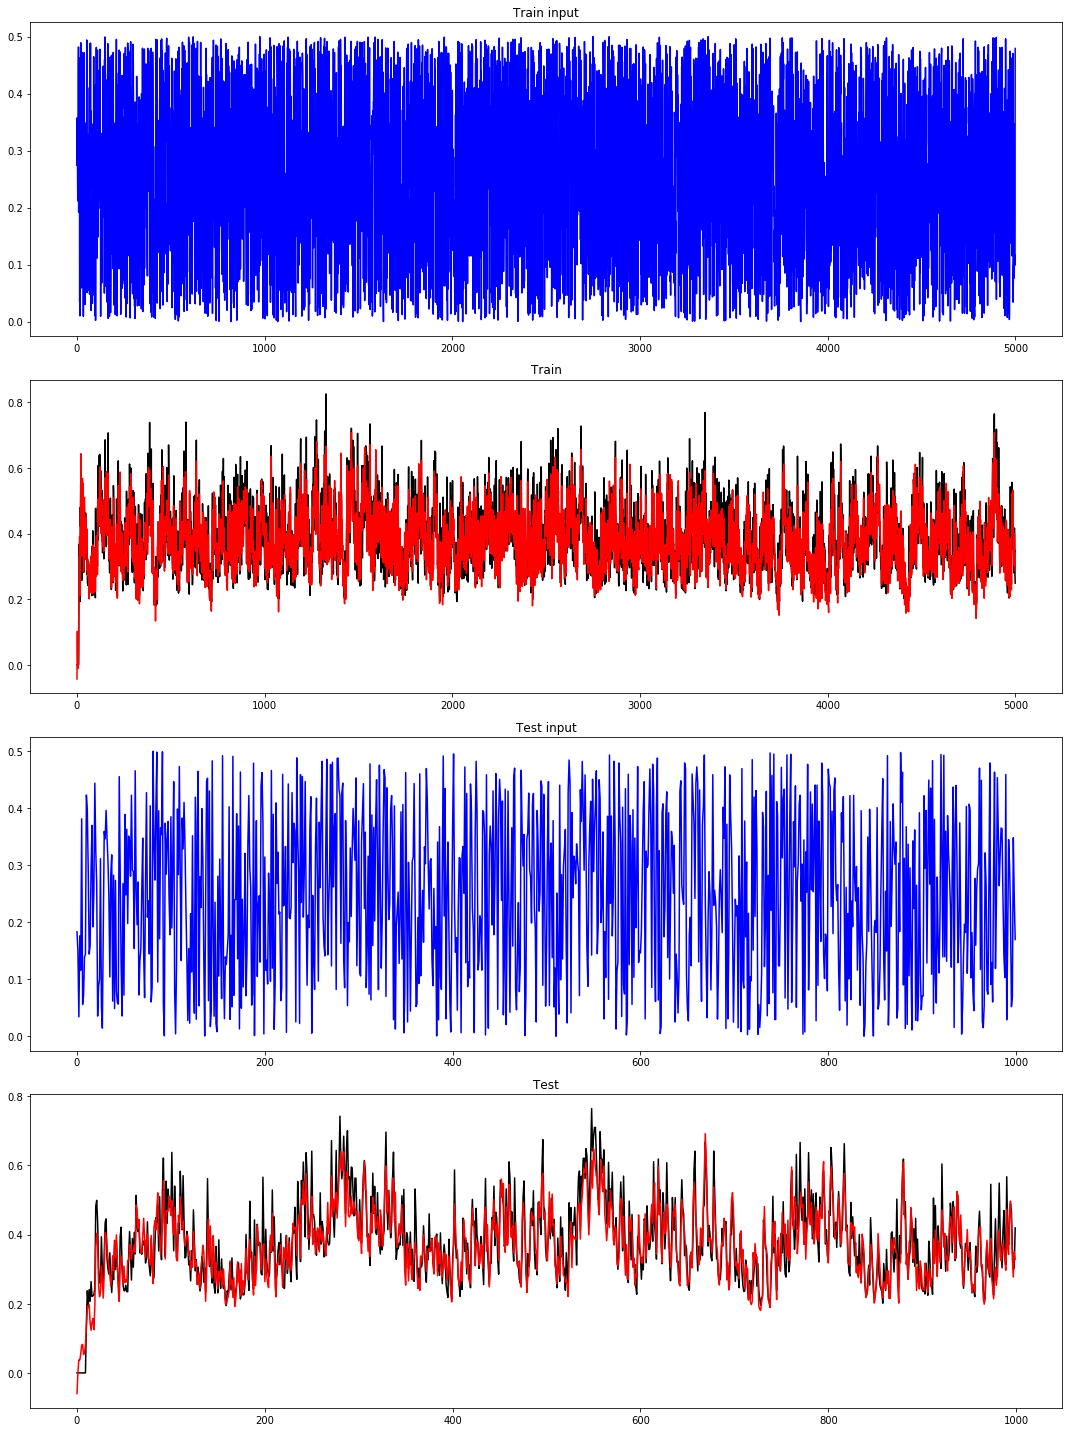

In [1]:
%reset -f
%matplotlib inline
import matplotlib.pyplot as plt
import mdp
import numpy as np
import Oger
import pylab

np.random.seed(0)

# Reservoir de demonstration pour la tache
# NARMA d'ordre 10.
 
# Genere le jeu d'entrainement et de test
u_train,y_train = Oger.datasets.narma10(n_samples = 1, sample_len = 5000)
u_test,y_test = Oger.datasets.narma10(n_samples = 1, sample_len = 1000)
 
# Construction du reservoir et de la couche
# de sortie.
reservoir = Oger.nodes.LeakyReservoirNode(input_dim=1, output_dim=100, leak_rate=.5)
readout = Oger.nodes.RidgeRegressionNode()
 
# Construit le flux
flow = mdp.Flow([reservoir, readout], verbose=1)
 
# Le jeu d'entrainement pour chaque noeud du reseau
data = [None, zip(u_train,y_train)]
 
# Entraine le flux
flow.train(data)
 
# Applique le reseau sur le jeu de test
y_hat_train = flow(u_train)
y_hat_test = flow(u_test)
 
# Mesure l'erreur du reseau
print "NRMSE: " + str(Oger.utils.nrmse(y_test[0], y_hat_test))
print "NMSE: " + str(Oger.utils.nmse(y_test[0], y_hat_test))
print "RMSE: " + str(Oger.utils.rmse(y_test[0], y_hat_test))
print "MSE: " + str(Oger.utils.mse(y_test[0], y_hat_test))

fig, axs = plt.subplots(4, 1, figsize=(15, 20), tight_layout=True)

axs[0].plot(u_train[0], color='b')
axs[0].set_title('Train input')

axs[1].plot(y_train[0], color='k')
axs[1].plot(y_hat_train, color='r')
axs[1].set_title('Train')

axs[2].plot(u_test[0], color='b')
axs[2].set_title('Test input')

axs[3].plot(y_test[0], color='k')
axs[3].plot(y_hat_test, color='r')
axs[3].set_title('Test');

# Use reservoir to fit univariate exponential filters
Train on univariate time-series exponentially filtered with different time constants.

Training node #0 (LeakyReservoirNode)
Training finished
Training node #1 (RidgeRegressionNode)
Training finished
Close the training phase of the last node
Training node #0 (LeakyReservoirNode)
Training finished
Training node #1 (RidgeRegressionNode)
Training finished
Close the training phase of the last node
Training node #0 (LeakyReservoirNode)
Training finished
Training node #1 (RidgeRegressionNode)
Training finished
Close the training phase of the last node
Training node #0 (LeakyReservoirNode)
Training finished
Training node #1 (RidgeRegressionNode)
Training finished
Close the training phase of the last node
Training node #0 (LeakyReservoirNode)
Training finished
Training node #1 (RidgeRegressionNode)
Training finished
Close the training phase of the last node
Training node #0 (LeakyReservoirNode)
Training finished
Training node #1 (RidgeRegressionNode)
Training finished
Close the training phase of the last node
Training node #0 (LeakyReservoirNode)
Training finished
Training node 

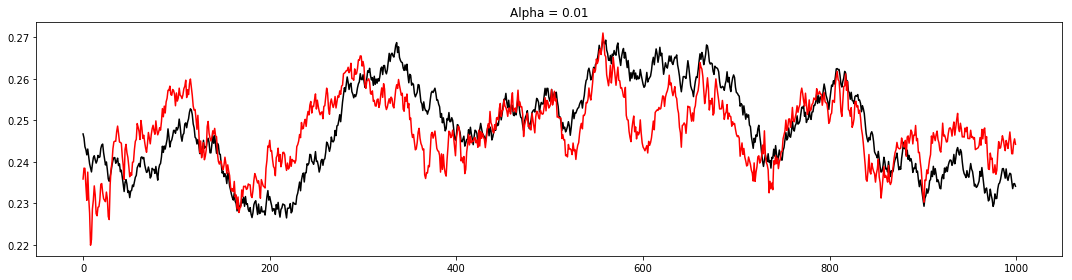

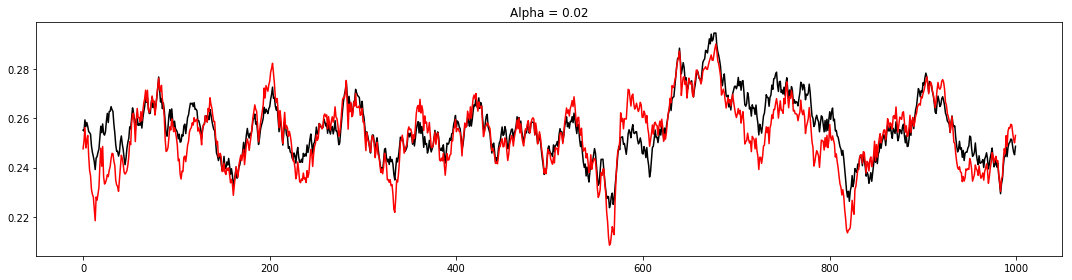

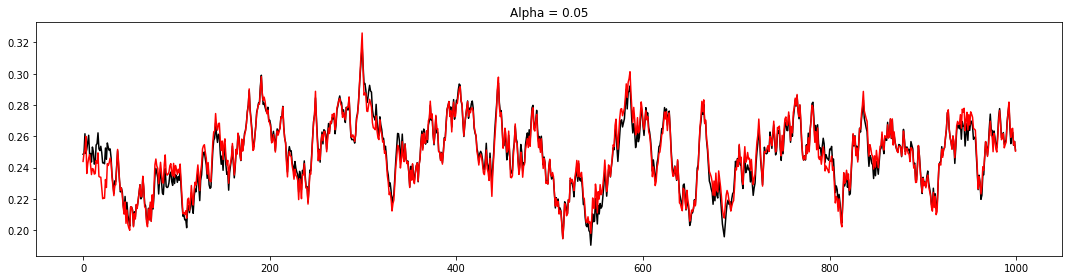

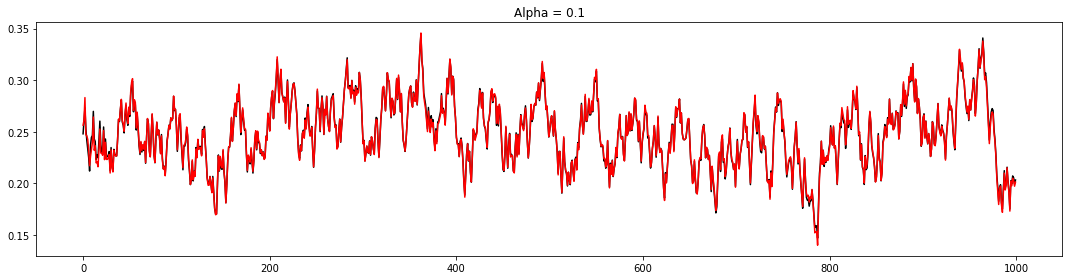

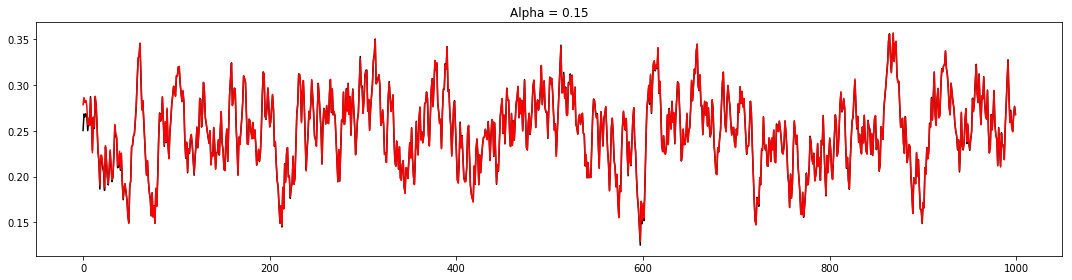

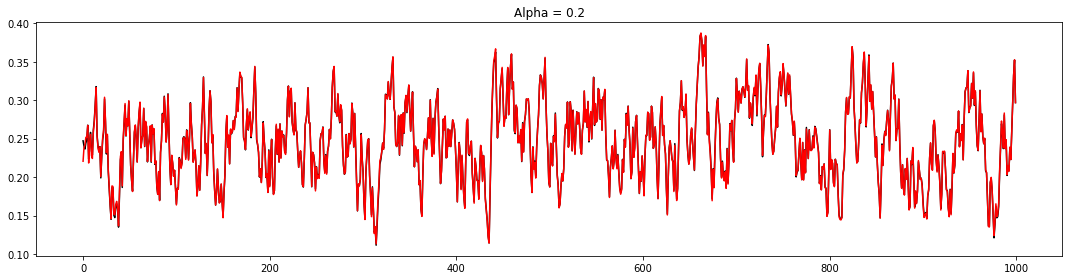

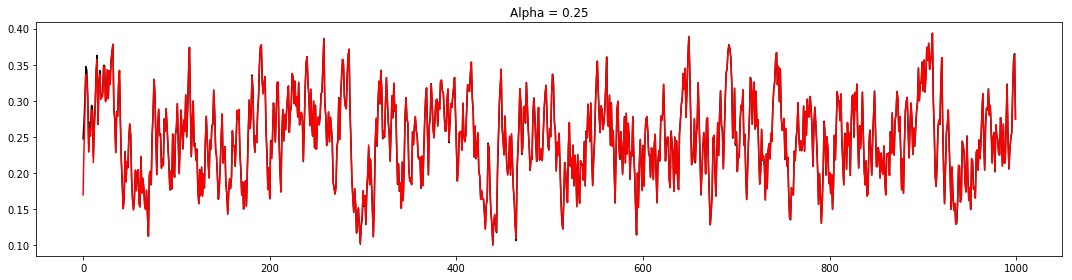

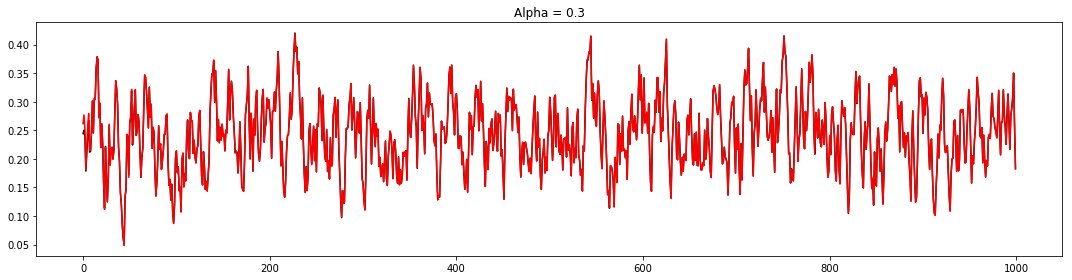

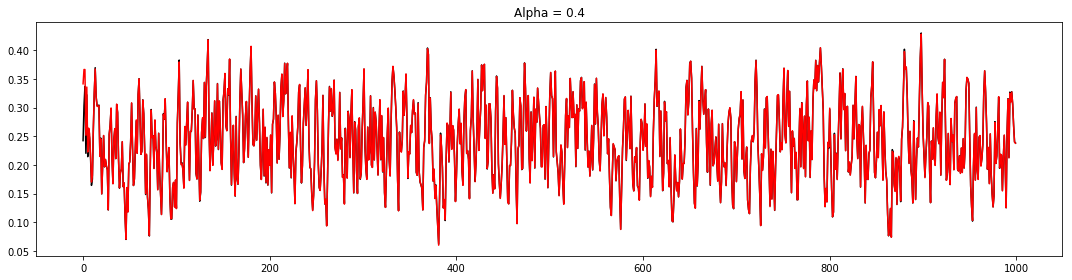

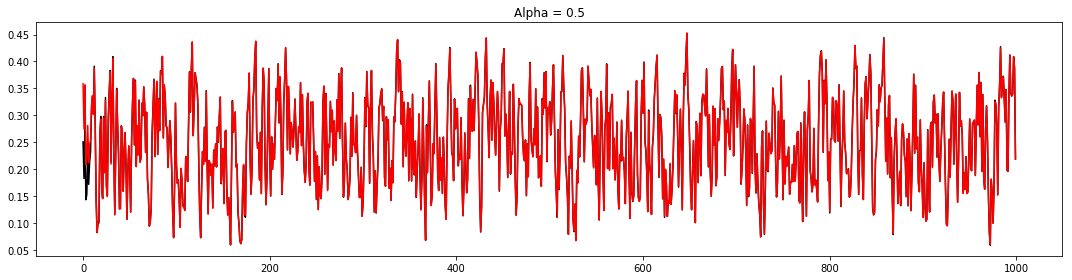

In [2]:
%reset -f
%matplotlib inline
import matplotlib.pyplot as plt
import mdp
import numpy as np
import Oger
import pylab


ALPHAS = [.01, .02, .05, .1, .15, .2, .25, .3, .4, .5]  # decay rate (from 0 to 1)

np.random.seed(0)

def gen_exp_filter_data(sample_len, alpha):
    """Generate exponentially filtered data sample."""
    u = np.random.uniform(0, .5, (sample_len, 1))
    y = np.nan * np.zeros(u.shape)
    
    y[0, 0] = u.mean()
    for ctr in range(1, len(y)):
        y[ctr, 0] = alpha*u[ctr, 0] + (1-alpha)*y[ctr-1, 0]
        
    return [u], [y]


# loop over filtering smoothnesses
for alpha in ALPHAS:
    # generate data
    u_train, y_train = gen_exp_filter_data(sample_len=5000, alpha=alpha)
    u_test, y_test = gen_exp_filter_data(sample_len=1000, alpha=alpha)

    # make Leaky Integrator Reservoir and Readout nodes
    reservoir = Oger.nodes.LeakyReservoirNode(input_dim=1, output_dim=100, leak_rate=.5)
    readout = Oger.nodes.RidgeRegressionNode()

    # create data flow
    flow = mdp.Flow([reservoir, readout], verbose=1)

    # set up data for fitting
    data = [None, zip(u_train, y_train)]

    # train network (readout weights only)
    flow.train(data)

    # compute output predictions
    y_hat_train = [flow(u_train)]
    y_hat_test = [flow(u_test)]

    fig, ax = plt.subplots(1, 1, figsize=(15, 4), tight_layout=True)

    ax.plot(y_test[0], color='k')
    ax.plot(y_hat_test[0], color='r')
    ax.set_title('Alpha = {}'.format(alpha));